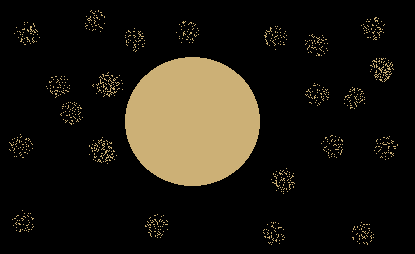

In [9]:
import numpy as np
import urllib
import cv2
from google.colab.patches import cv2_imshow

def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv

img = url_to_image(f'https://i.imgur.com/PLGlnWj.png')
BLUE_MIN = (110,50,50)
BLUE_MAX = (130,255,255)

#dst = cv2.inRange(img, BLUE_MIN, BLUE_MAX)

data_cord = []

height, width, channels = img.shape
size = height,width

for x in range(size[0]):
    
    for y in range(size[1]):
        r, g, b = img[x,y]
        if (r,g,b) >= BLUE_MIN and (r,g,b) <= BLUE_MAX:
            data_cord.append([int(x),int(y)])
            #img[x,y] = (255,255,255)

cv2_imshow(img)


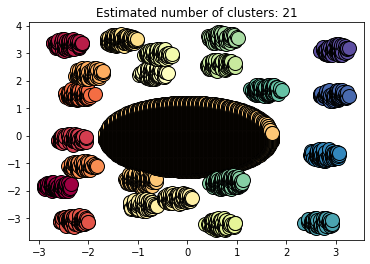

In [14]:
import numpy as np
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(data_cord)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

import matplotlib.pyplot as plt

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        pass

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

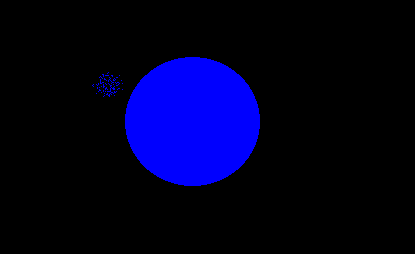

In [15]:
dict_data = dict(Counter(labels))
template_max = max(dict_data, key=dict_data.get)
result_cluster = []

for i in range(len(labels)):
    if labels[i] == template_max:
      x,y = data_cord[i]
      result_cluster.append(data_cord[i])
      img[x,y] = (255,0,0)
    else:
      x,y = data_cord[i]
      img[x,y] = (0,0,0)

cv2_imshow(img)